In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

In [4]:
df = pd.read_csv('results_part3.csv')
# Rating1 & Secure1 = Margarethen
# Rating2 & Secure2 = Olympia
# expert: 1 = yes / 0 = no 
df.head(20)

,Rating1,Secure1,Rating2,Secure2,Expert,Unnamed: 5
0,4,3,2,3,1,NaN
1,4,5,3,2,0,NaN
2,3,4,2,4,0,NaN
3,4,4,4,5,0,NaN
4,3,4,4,4,1,NaN
5,3,3,3,3,0,NaN
6,4,4,4,2,0,NaN
7,3,4,2,4,0,NaN
8,4,4,3,3,1,NaN
9,4,4,4,3,0,NaN


## Auswertung zur Sternebewertung

In [45]:
print(str(df['Rating1'].mean())+' Average Stars Margarethen')
print(str(df['Rating2'].mean())+' Average Stars Olympia')

3.473684210526316 Average Stars Margarethen
3.3157894736842106 Average Stars Olympia


In [15]:
print(str(df[(df['Expert']==1)].Rating1.mean()) + ' Experten Bewertung Marga')
print(str(df[(df['Expert']==1)].Rating2.mean()) + ' Experten Bewertung Olymp')
print(str(df[(df['Expert']==0)].Rating1.mean()) + ' Non-Experten Bewertung Marga')
print(str(df[(df['Expert']==0)].Rating2.mean()) + ' Non-Experten Bewertung Olym')

3.6666666666666665 Experten Bewertung Marga
3.5 Experten Bewertung Olymp
3.3846153846153846 Non-Experten Bewertung Marga
3.230769230769231 Non-Experten Bewertung Olym


In [24]:
print(len(df[(df['Rating1']<df['Rating2'])]))
print((len(df[(df['Rating1']>df['Rating2'])])))
len(df[(df['Rating1']==df['Rating2'])])

4
7


8

Das Modell für die Margarethenstraße wird leicht positiver bewertet aber im Grunde beide Modelle gleich. Marga 3,47 Sterne, Olympia 3,32. (Experten schätzen beide Modelle besser ein als Nicht experten 3,66 vs. 3.38 und 3.5 vs. 3.23)
* 8 Personen haben beide Modelle gleich eingeschätzt (42 %)
* 4 Personen habe das erste Modell schlechter eingeschätz als das zweite (22%)
* 7 Personen haben mit component charts, das zweite Modell schlechter eingeschätzt als das erste (36%)

## Auswertung zur Einschätzung Sicherheit

In [29]:
print(str(df['Secure1'].mean())+' Average Sure Margarethen')
print(str(df['Secure2'].mean())+' Average Sure Olympia')

3.6842105263157894 Average Sure Margarethen
3.4210526315789473 Average Sure Olympia


In [30]:
print(len(df[(df['Secure1']<df['Secure2'])]))
print((len(df[(df['Secure1']>df['Secure2'])])))
len(df[(df['Secure1']==df['Secure2'])])

4
7


8

Insgesamt leicht sicherer ohne component charts

* 8 Personen gleich sicher 
* 7 Personen sicherer ohne component charts
* 4 Personen sicherer mit component charts

Kein großer Unterschied für Experten

In [33]:
print(str(df[(df['Expert']==1)].Secure1.mean()) + ' Experten Bewertung Marga')
print(str(df[(df['Expert']==1)].Secure2.mean()) + ' Experten Bewertung Olymp')
print(str(df[(df['Expert']==0)].Secure1.mean()) + ' Non-Experten Bewertung Marga')
print(str(df[(df['Expert']==0)].Secure2.mean()) + ' Non-Experten Bewertung Olym')

3.5 Experten Bewertung Marga
3.5 Experten Bewertung Olymp
3.769230769230769 Non-Experten Bewertung Marga
3.3846153846153846 Non-Experten Bewertung Olym


## Grafik 

In [34]:
df2 = pd.read_csv('Bewertungen_Task3.csv')
df2.head()

,Ort,1Stern,2Stern,3Stern,4Stern,5Stern,Secure1,Secure2,Secure3,Secure4,Secure5,Unnamed: 11
0,Margareten,0,2,6,11,0,0,1,5,12,1,NaN
1,Olympia,0,4,6,8,1,0,2,9,6,2,NaN


C:\Users\strub\AppData\Local\Temp\ipykernel_4712\3912712434.py:40: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig("StudyTask45.pdf",bbox_inches='tight')
C:\Users\strub\AppData\Local\Temp\ipykernel_4712\3912712434.py:40: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig("StudyTask45.pdf",bbox_inches='tight')
C:\Users\strub\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


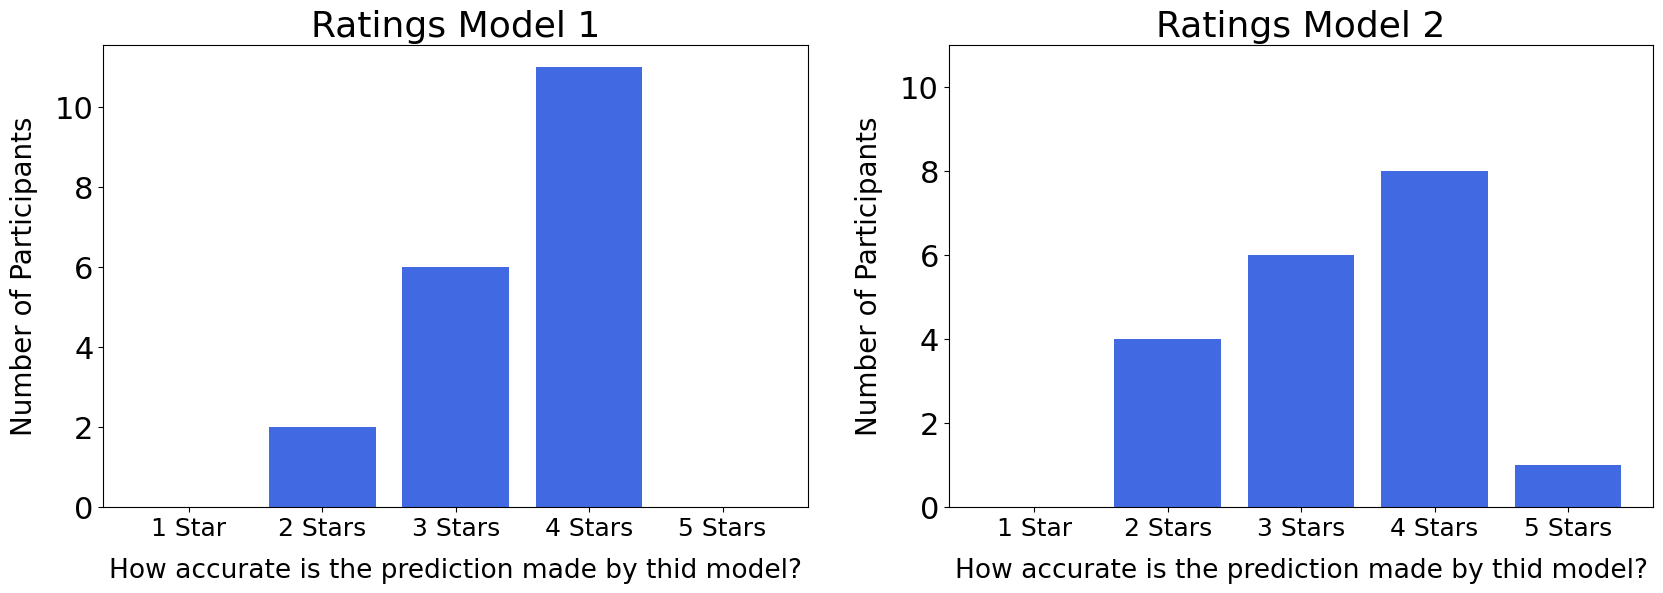

In [44]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure(constrained_layout=True, figsize=(20, 6))
spec = mpl.gridspec.GridSpec(ncols=2, nrows=1)
spec.update(wspace=0.2, hspace=0.35)
plt.rc('ytick', labelsize=22)

ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])


objects = ('1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars')
y_pos = np.arange(len(objects))
performance1 = [0,2,6,11,0]
performance2 = [0,4,6,8,1]

ax1.bar(y_pos, performance1, align='center', alpha=1.0, color='royalblue')
ax1.set_xticks(y_pos, objects, fontsize=18)
ax1.set_ylabel('Number of Participants',labelpad=12, fontsize=20)
ax1.set_xlabel('How accurate is the prediction made by thid model?', labelpad=12, fontsize=19)
ax1.set_title('Ratings Model 1', fontsize=26)

#ax1.yaxis.set_ticks([0,2,4,6,8]) 


ax2.bar(y_pos, performance2, align='center', alpha=1.0, color='royalblue')
ax2.set_xticks(y_pos, objects, fontsize=18)
ax2.set_ylabel('Number of Participants',labelpad=12, fontsize=20)
ax2.set_xlabel('How accurate is the prediction made by thid model?',labelpad=12, fontsize=19)
ax2.set_title('Ratings Model 2', fontsize=26)
ax2.yaxis.set_ticks([0,2,4,6,8,10]) 
ax2.set_ylim(0,11)

plt.savefig("StudyTask45.pdf",bbox_inches='tight') 

plt.show()
